# Primer trabajo práctico Señales y sistemas


## *Función sintetización de ruido rosa*


- *Gonzalez Leonardo*
- *Rode Valentin* 
- *Córsico Justo*


Para sintetizar ruido rosa , se partió de la función RuidoRosaVoss, cuya estructrura se basa en el algoritmo de Voss - McCartney. Para poder sintetizar el ruido rosa durante un cierto tiempo T, elegido por el usuario y a su vez a una frecuencia de muestreo fs también elegida por el usuario , se agregaron al código las siguientes librerías:


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile
import pandas as pd
import soundfile as sf

Luego , se definió una funcion get_data, que para que el usuario pueda ingresar los valores de tiempo y frecuencia de sampleo.

In [2]:
def get_data():
    t=int(input("Ingrese tiempo de duracion del ruido rosa:"))
    fs=int(input("Ingrese la frecuencia de muestreo"))
    return(t,fs)

La misma retorna t y fs en un vector de 2 posiciones.

Para guardar el retorno de get_data en el main usamos:

In [3]:
t,fs=get_data()

Luego ,podemos inicializar la función ruido rosa sabiendo que nrows es el producto entre la cantidad de segundos 
de duración y la frecuencia de sampleo del ruido

In [4]:
def ruidoRosa_voss(nrows, ncols):
    array = np.full((nrows, ncols), np.nan)
    array[0, :] = np.random.random(ncols)
    array[:, 0] = np.random.random(nrows)
    
    # el numero total de cambios es nrows
    n = nrows
    cols = np.random.geometric(0.5, n)
    cols[cols >= ncols] = 0
    rows = np.random.randint(nrows, size=n)
    array[rows, cols] = np.random.random(n)
    
    df = pd.DataFrame(array)
    filled = df.ffill(axis=0)
    total = filled.sum(axis=1)
    
    ## Centrado de el array en 0
    total = total - total.mean()
    
    ## Normalizado
    valor_max = max(abs(max(total)),abs(min(total)))
    total = total / valor_max
    
    # Agregar generación de archivo de audio .wav
    
    return total

Para inicializar la funcion ruido rosa usamos la siguiente instruccion en el programa main.


In [5]:
total=ruidoRosa_voss(t*fs,16) #Esta instrucción guarda el retorno de la función en la variable "total".


La variable "total" ahora adquiere carácter global , es decir la podemos instanciar desde cualquier lugar del código por haberla definido en el main

Luego definimos una función para crear el archivo wav , sabiendo que "total" es un vector que contiene valores de
imagen del ruido rosa.En nuestro caso usamos la librería soundfile pero podria haber sido cualquier otra.


In [6]:
def ruido_rosa_user(t,fs,total):
    sf.write("Ruido rosa.wav",total,fs,format="WAV",subtype="PCM_16")
    return


Para llamar a esta función del main lo hacemos de la siguiente manera:

In [7]:
ruido_rosa_user(t,fs,total)

Luego , si queremos ver el dominio temporal de la función generada podemos definir un get_plot

In [8]:
def get_plot(t,fs,total):
    m=np.linspace(0,t,fs*t)
    plt.plot(m,total)
    plt.xlim=(0,t)
    plt.xlabel("Tiempo(S)")
    plt.ylabel("Amplitud")
    plt.show()
    return

Cuya función es generar un vector "m" de largo fs*t para usar como eje X en el plot y luego usar el vector "total" como imagen del plot.

Y llamándolo del main con el siguiente comando , tendriamos el programa completo

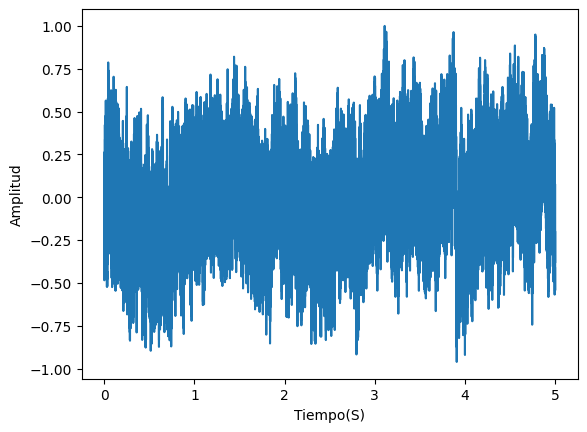

In [9]:
get_plot(t,fs,total)

**El programa general , con las correspondientes funciones ,librerias y main quedaría de la siguiente manera:**

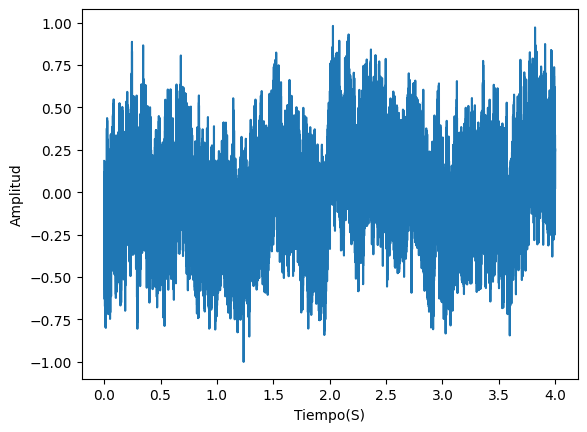

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile
import pandas as pd
import soundfile as sf



def ruidoRosa_voss(nrows, ncols):
    array = np.full((nrows, ncols), np.nan)
    array[0, :] = np.random.random(ncols)
    array[:, 0] = np.random.random(nrows)
    
    # el numero total de cambios es nrows
    n = nrows
    cols = np.random.geometric(0.5, n)
    cols[cols >= ncols] = 0
    rows = np.random.randint(nrows, size=n)
    array[rows, cols] = np.random.random(n)
    
    df = pd.DataFrame(array)
    filled = df.ffill(axis=0)
    total = filled.sum(axis=1)
    
    ## Centrado de el array en 0
    total = total - total.mean()
    
    ## Normalizado
    valor_max = max(abs(max(total)),abs(min(total)))
    total = total / valor_max
    
    # Agregar generación de archivo de audio .wav
    
    return total
def get_data():
    t=int(input("Ingrese tiempo de duracion del ruido rosa:"))
    fs=int(input("Ingrese la frecuencia de muestreo:"))
    return(t,fs)

def ruido_rosa_user(t,fs,total):
    sf.write("Ruido rosa.wav",total,fs,format="WAV",subtype="PCM_16")
    return
def get_plot(t,fs,total):
    m=np.linspace(0,t,fs*t)
    plt.plot(m,total)
    plt.xlim=(0,t)
    plt.xlabel("Tiempo(S)")
    plt.ylabel("Amplitud")
    plt.show()
    return
#main
t,fs=get_data()
total=ruidoRosa_voss(t*fs,16)
ruido_rosa_user(t,fs,total)
get_plot(t,fs,total)

*Gráfico del ruido rosa en el dominio temporal*


In [ ]:
# import IPython as IP
# IP.display.Audio(r"C:\Users\Valentin Rode\Desktop\Valen\SyS\Tp1_Sys\TPsysgit\RuidoRosa\Ruido Rosa.wav")

El espectro del ruido rosa generado fue:

<img src='EspectroRuidoRosa.png'>

*Archivo WAV del ruido rosa generado*